<a href="https://colab.research.google.com/github/cybermax47/CS-351-AI-Lab-Github-repository-2022447/blob/main/2022447_CS_351_Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LAB#06**


### **Clustering Techniques with Python**


### **Unsupervised Clustering**
This notebook demonstrates k-Means and Hierarchical Clustering using the Iris dataset. It includes data preprocessing, visualization, and comparison of the clusters formed.

#### **Steps Included**
1. **Data Setup**: Loading the Iris dataset.
2. **Data Preprocessing**: Scaling the data with Min-Max Scaler.
3. **k-Means Clustering**: Implementation and visualization.
4. **Hierarchical Clustering**: Implementation, dendrogram plotting, and visualization.
5. **Comparison**: Analyze and compare clusters formed by both methods.

#### **How to Run**
- Load the dataset.
- Follow through preprocessing and clustering.
- Visualize and interpret results.


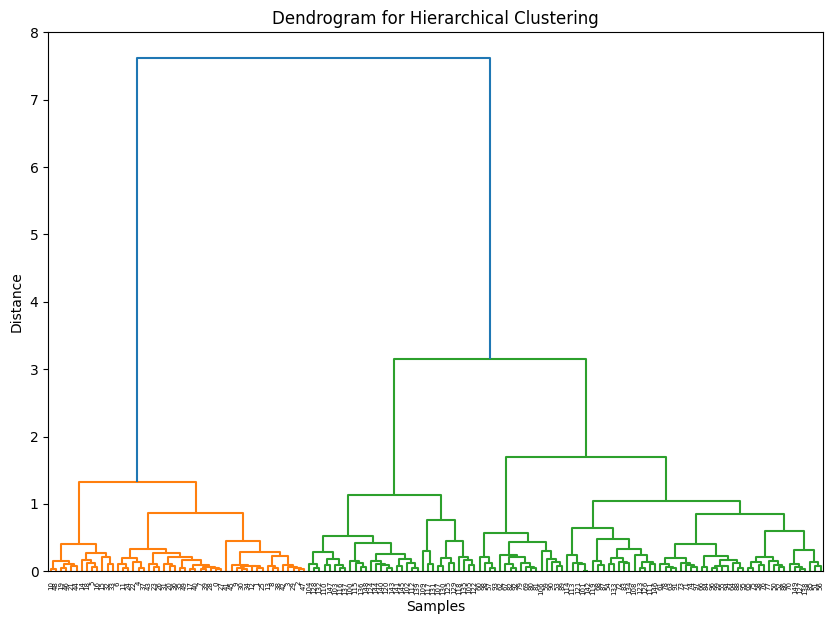

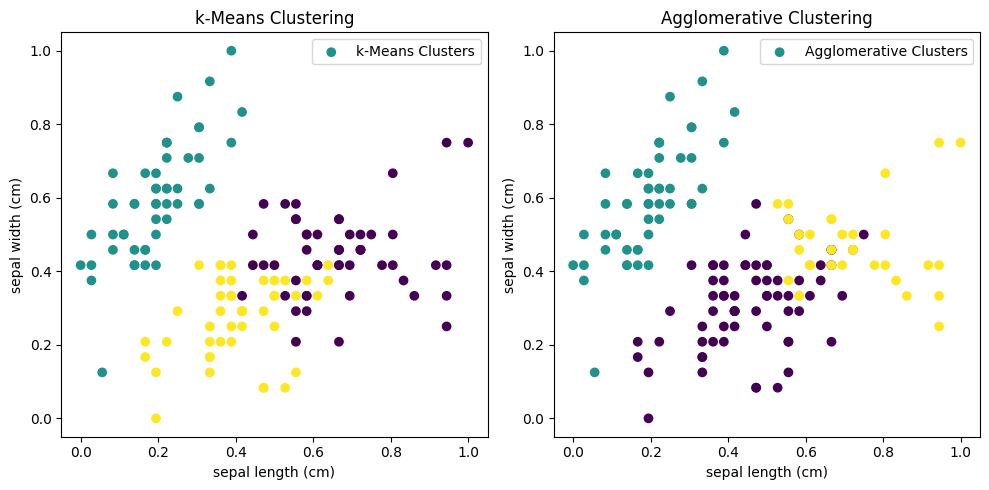

k-Means Cluster Centers:
 [[0.66773504 0.44310897 0.7571708  0.78205128]
 [0.19611111 0.595      0.07830508 0.06083333]
 [0.41203704 0.27690972 0.55896893 0.52083333]]

Cluster Labels from k-Means:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0]

Cluster Labels from Agglomerative Clustering:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

Ground Truth:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 1: Data Setup
# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Step 2: Data Preprocessing
# Normalize the dataset using Min-Max scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Step 3: Implement k-Means Clustering
# Initialize k-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Step 4: Implement Hierarchical Clustering
# Use Agglomerative clustering with 3 clusters
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(df_scaled)


# Plotting a dendrogram
linkage_matrix = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Step 5: Visualizations
# Convert labels to DataFrame for plotting
df['kmeans_labels'] = kmeans_labels
df['agglo_labels'] = agglo_labels

# Scatter plot for k-Means clustering
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap='viridis', label='k-Means Clusters')
plt.title("k-Means Clustering")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend()

# Scatter plot for Agglomerative clustering
plt.subplot(1, 2, 2)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=agglo_labels, cmap='viridis', label='Agglomerative Clusters')
plt.title("Agglomerative Clustering")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend()

plt.tight_layout()
plt.show()

# Step 6: Compare Results
print("k-Means Cluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Labels from k-Means:\n", kmeans_labels)
print("\nCluster Labels from Agglomerative Clustering:\n", agglo_labels)

# Compare with ground truth if available
if 'target' in data:
    ground_truth = data.target
    print("\nGround Truth:\n", ground_truth)
